In [1]:
import pandas as pd
import numpy as np
import MySQLdb
import os
import matplotlib.pyplot as plt

In [2]:
from dotenv import load_dotenv
from pathlib import Path

#dotenv_path = Path('~/.env_mysql_ccs')
dotenv_path = Path.home() / '.env_mysql_ccs'

try:
    load_dotenv(dotenv_path=dotenv_path)
except Exception as e:
    print("Error loading .env file:", e)

In [3]:
# Environment Variables
MYSQL_HOST = os.environ.get("MYSQL_HOST")
MYSQL_DATABASE = os.environ.get("MYSQL_DATABASE")
MYSQL_PASSWORD = os.environ.get("MYSQL_PASSWORD")
MYSQL_USER = os.environ.get("MYSQL_USER")
MYSQL_PORT = int(os.environ.get("MYSQL_PORT"))

#MYSQL_HOST, MYSQL_DATABASE, MYSQL_PASSWORD, MYSQL_USER, MYSQL_PORT

In [4]:
conn = MySQLdb.connect(host=MYSQL_HOST, \
                     user=MYSQL_USER, \
                     passwd=MYSQL_PASSWORD, \
                     db=MYSQL_DATABASE, \
                     port=MYSQL_PORT)                               

# you must create a Cursor object. It will let you execute all the queries you need
cursor = conn.cursor()

In [5]:
# Use all the SQL you like
sql = "SELECT COUNT(*) FROM constituents"
cursor.execute(sql)
result = cursor.fetchall()
result

((256240,),)

In [8]:
### Column Names of Constituents Table

sql = "SELECT COLUMN_NAME FROM INFORMATION_SCHEMA.COLUMNS \
       WHERE TABLE_NAME = 'constituents'\
       ORDER BY ORDINAL_POSITION"
cursor.execute(sql)
result_columns = cursor.fetchall()
column_names = [col[0] for col in result_columns]

In [6]:
### Pull all the constituent data for NSF (eight files)
client_name = "National Scleroderma Foundation"
file_kind = "constituent"
sql = "SELECT constituents.* from constituents\
        join files on constituents.file_id=files.file_id\
        join clients on files.client_id=clients.client_id\
        where client_name = '%s' and file_kind = '%s'" %(client_name, file_kind)

cursor.execute(sql)                
result_data = cursor.fetchall()
#df_nsf = result.to_pandas()

In [9]:
# Convert result to DataFrame
df_nsf = pd.DataFrame(result_data, columns=column_names)
df_nsf = df_nsf.drop(columns="file_id")

In [12]:
len(df_nsf.keys())

63

In [69]:
df_nsf.to_csv("files/national_scleroderma_foundation_constituent_ccsdb.csv")

<Axes: >

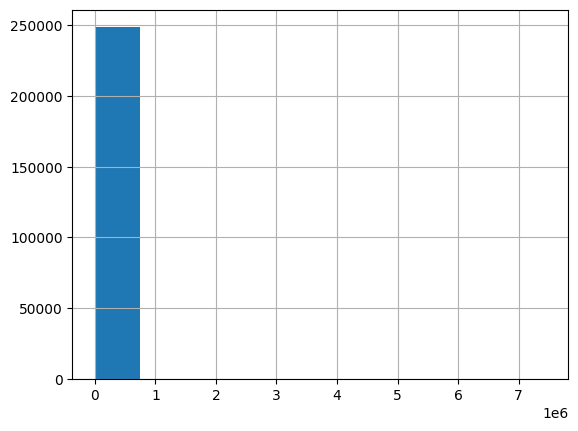

In [68]:
df_nsf.lifetime_giving.hist()

In [8]:
conn.close()